## Importar Librerias

In [35]:
import numpy as np
from sympy import*
import matplotlib.pyplot as plt

init_printing()

### Definicion Pendulo 

In [36]:
class Pendulo():
    def __init__(self, l, g, ts):
        super(Pendulo,self).__init__()
        self.l = l
        self.g = g
        self.ts = ts
                 
    def f(self, x):
        l = self.l
        g = self.g
        theta = x[0]
        theta_p = x[1]
        theta_pp = -(g/l)*np.sin(theta)
        flow = np.array([theta_p, theta_pp])
        return flow
    
    def f_d(self, x):
        ts = self.ts
        x = x + ts*self.f(x)
        return x

### Function Simulacion

In [50]:
def simulation(ts, tf, x0):
    t = np.arange(0, tf + ts, ts, dtype=np.double)
    x = np.zeros((2, t.shape[0]), dtype = np.double)
    x[:, 0] = x0

    g = 9.8
    l = 1.0

    pendulo_1 = Pendulo(l, g, ts)
    
    for k in range(0, t.shape[0]-1):
    
        x[:, k+1] = pendulo_1.f_d(x[:, k])
    return x, t
    

### Inicializar parameteros simulacion

In [64]:
ts = 0.01
tf = 50
x0 = np.array([0.1, 0])
x, t = simulation(ts, tf, x0)

### Plot Resultados

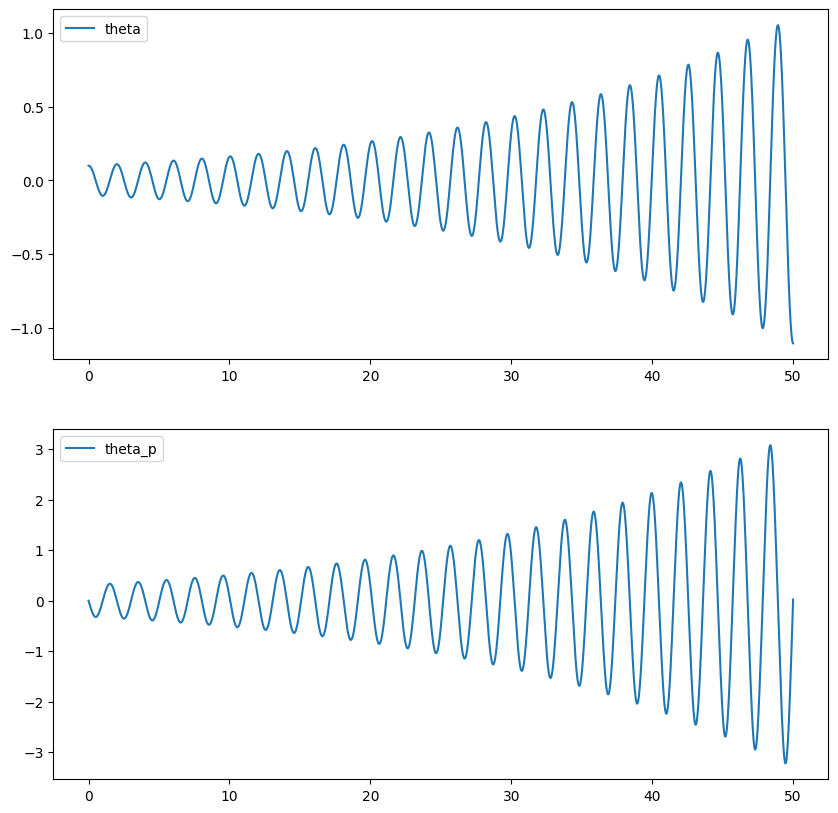

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot x_estimate with label 'x_estimate'
ax1.plot(t, x[0, :], label='theta')
ax2.plot(t, x[1, :], label='theta_p')


# Add a legend
ax1.legend()
ax2.legend()
# Show the plot
plt.show()